<h1 style='color:red' align='center'>Graduate Admission Chances</h1>

#### Life cycle of data science Project

- Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory Data Analysis (EDA)
- Data Pre-Processing (Feature Engineering)
- Model Training

### 1. Problem statement
- This project is to predict the chances for student to get graduate admission from US universities.


### 2. Data Collection
- Dataset Source: https://www.kaggle.com/datasets/tanmoyie/us-graduate-schools-admission-parameters

### 2.1 Import Dependencies and Dataset

In [1]:
# Importing numpy, pandas, seaborn, & matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
%matplotlib inline

In [2]:
# Importing the CSV file
df = pd.read_csv('admission_chances.csv')

In [3]:
# Print top 5 Records
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### 2.2 Dataset information

#### Dataset contains under given important parameters which are considered mainly during application for Masters Programs.

##### Parameters description:
- Serial No: unique numbers allotted to students on their admission.
- GRE Score: standardized graduate program aptitude test that focuses on checking students' analytical, verbal and quantitative reasoning skills.
- TOEFL Score: standardized test to measure the English language ability of non-native speakers wishing to enroll in English-speaking universities.
- University Rating: classification or ranking of universities based on a comparative assessment of their quality, standard, or performance.  
- SOP: letter written by the applicant conveying their intent for choosing a particular course, their interests, goals and career plans. 
- LOR: letter of recommendation provided by a faculty member of your current or previous educational institution.
- CGPA: Culmulative Grade Point Average.
- Research: research for admission.
- Chance of Admit: chances of being admitted.

### 3. Data Checks to perform

In [4]:
# Shape of the dataset (show the number of columns and rows)
df.shape

(400, 9)

In [5]:
# Checking missing values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
# Check duplicates
df.duplicated().sum()

0

In [7]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [8]:
# Check the number of unique values from each column
df.nunique()

Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

In [9]:
# Check the count of unique values in the university rating column
df['University Rating'].value_counts()

University Rating
3    133
2    107
4     74
5     60
1     26
Name: count, dtype: int64

### 4. Exploratory Data Analysis (EDA)

In [10]:
# Univariate Non-Graphical
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


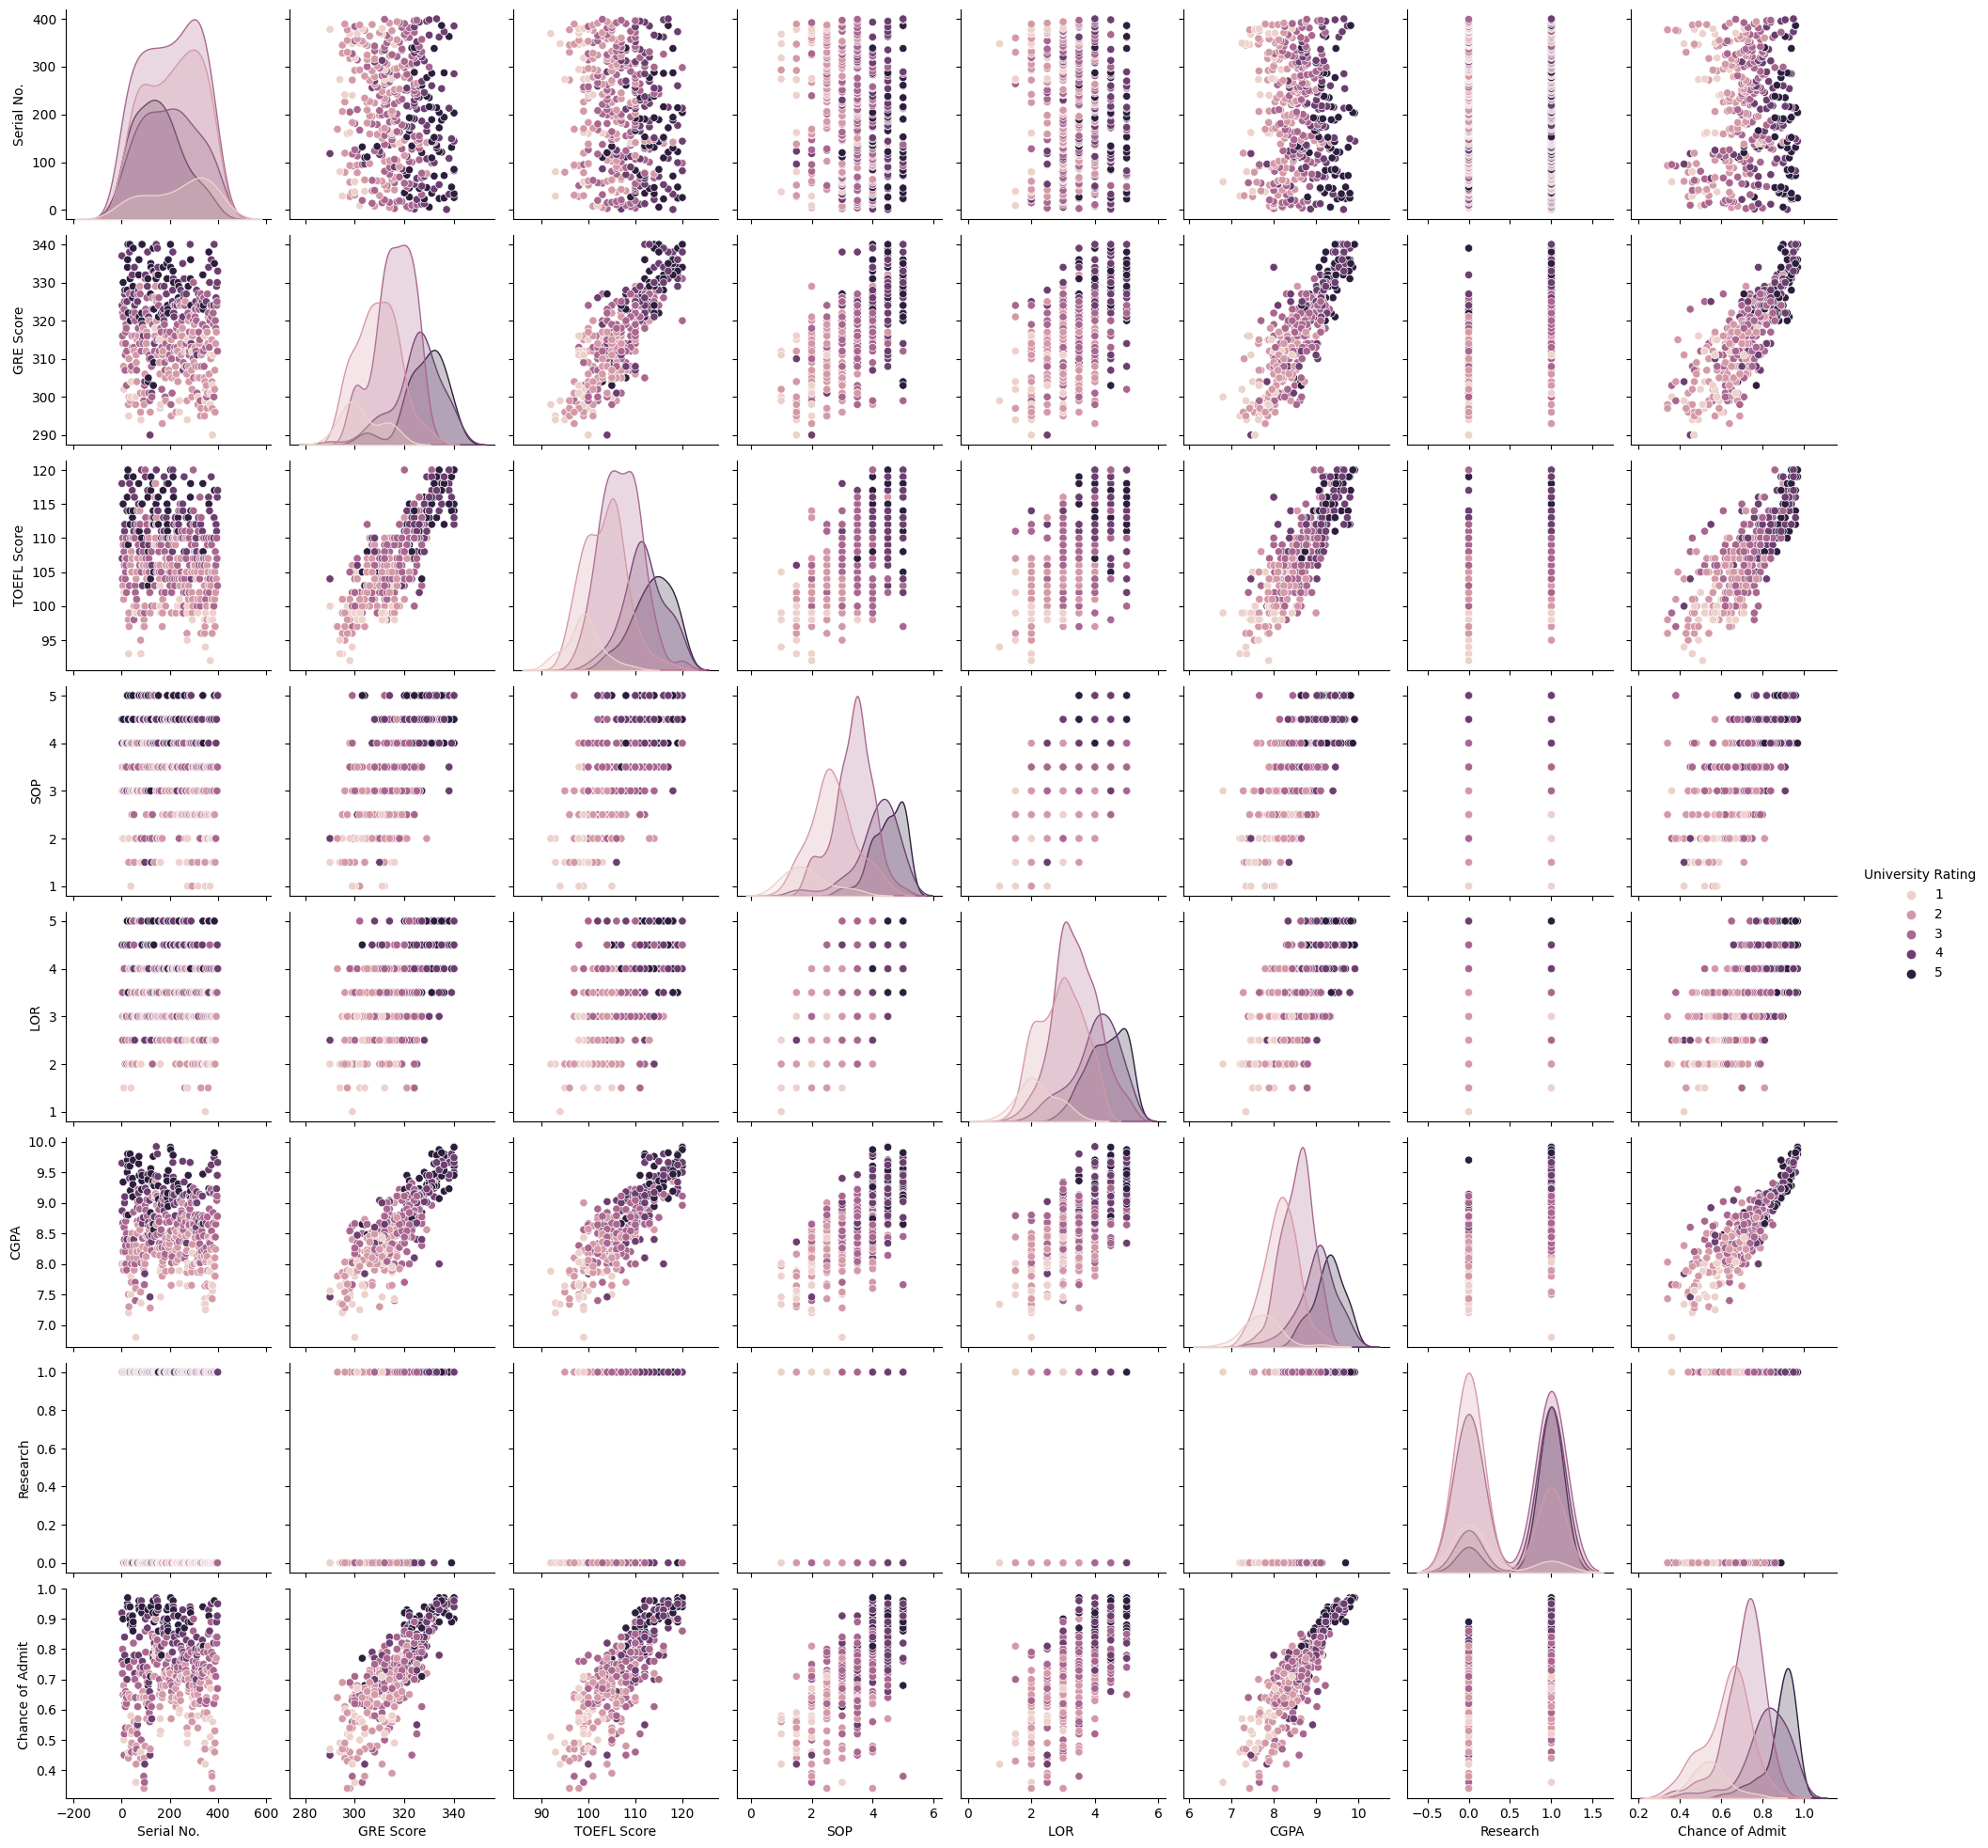

In [11]:
# Multivariate Graphical
sns.pairplot(df, hue='University Rating')

In [12]:
# Correlation (Non-Graphical) to check the correlation
corr = df.corr().round(2)
corr

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.00,-0.10,-0.15,-0.17,-0.17,-0.09,-0.05,-0.06,0.04
GRE Score,-0.10,1.00,0.84,0.67,0.61,0.56,0.83,0.58,0.80
TOEFL Score,-0.15,0.84,1.00,0.70,0.66,0.57,0.83,0.49,0.79
University Rating,-0.17,0.67,0.70,1.00,0.73,0.66,0.75,0.45,0.71
SOP,-0.17,0.61,0.66,0.73,1.00,0.73,0.72,0.44,0.68
LOR,-0.09,0.56,0.57,0.66,0.73,1.00,0.67,0.40,0.67
CGPA,-0.05,0.83,0.83,0.75,0.72,0.67,1.00,0.52,0.87
Research,-0.06,0.58,0.49,0.45,0.44,0.40,0.52,1.00,0.55
Chance of Admit,0.04,0.80,0.79,0.71,0.68,0.67,0.87,0.55,1.00


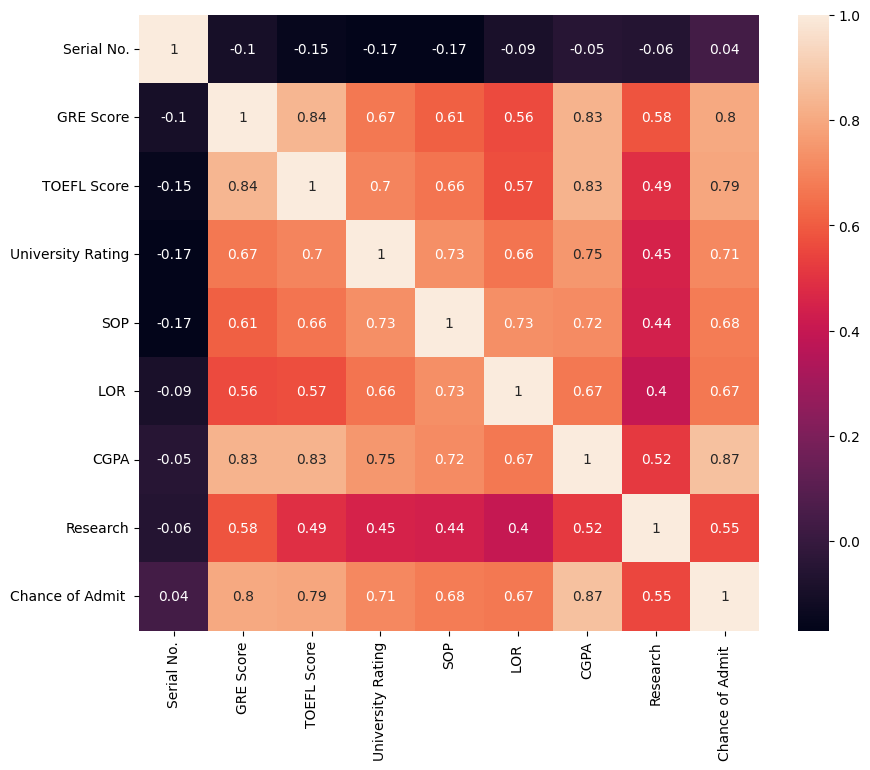

In [13]:
# Correlation (Graphical) to visualize the correlation
plt.figure(figsize=(10,8))
plot=sns.heatmap(df.corr().round(2), annot = True)

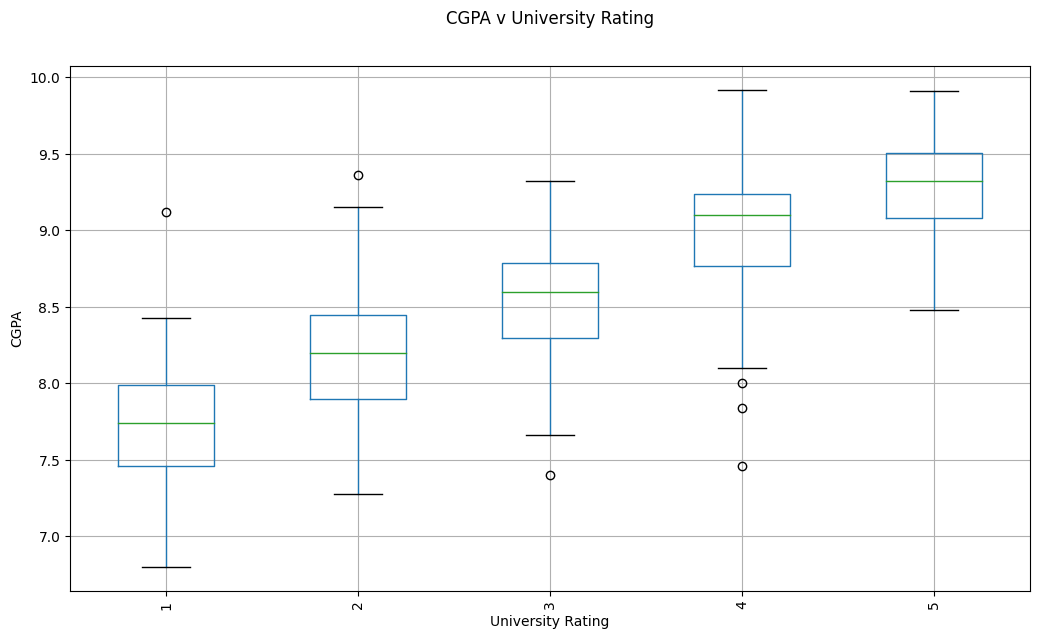

In [14]:
# Boxplot to check the outliers
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('CGPA', 'University Rating', ax=ax)
plt.suptitle('CGPA v University Rating')
plt.title('')
plt.ylabel('CGPA')
plt.xticks(rotation=90)
plt.show()

### 5. Data Pre-Processing (Feature Engineering)

In [15]:
# Feature selection (Dropping unecessary column)
df2 = df.drop(['Serial No.'], axis=1)

df2.head() # Printing the top 5 records

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [16]:
# Splitting dependent variable from independent variables
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

In [17]:
# Printing the independent variables
print(X)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
395        324          110                  3  3.5   3.5  9.04         1
396        325          107                  3  3.0   3.5  9.11         1
397        330          116                  4  5.0   4.5  9.45         1
398        312          103                  3  3.5   4.0  8.78         0
399        333          117                  4  5.0   4.0  9.66         1

[400 rows x 7 columns]


In [18]:
# Printing the dependent variable
print(y)

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64


### 6. Model Training

In [19]:
# Splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [20]:
model = keras.Sequential([
    keras.layers.Dense(250, input_shape=(7,), activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='mean_absolute_error',metrics=['mean_absolute_error'])

history = model.fit( X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
9/9 [==============================] - 3s 39ms/step - loss: 1.3683 - mean_absolute_error: 1.3683 - val_loss: 0.5645 - val_mean_absolute_error: 0.5645
Epoch 2/5
9/9 [==============================] - 0s 10ms/step - loss: 0.3252 - mean_absolute_error: 0.3252 - val_loss: 0.2258 - val_mean_absolute_error: 0.2258
Epoch 3/5
9/9 [==============================] - 0s 8ms/step - loss: 0.1606 - mean_absolute_error: 0.1606 - val_loss: 0.1275 - val_mean_absolute_error: 0.1275
Epoch 4/5
9/9 [==============================] - 0s 8ms/step - loss: 0.1141 - mean_absolute_error: 0.1141 - val_loss: 0.0833 - val_mean_absolute_error: 0.0833
Epoch 5/5
9/9 [==============================] - 0s 8ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - val_loss: 0.0783 - val_mean_absolute_error: 0.0783


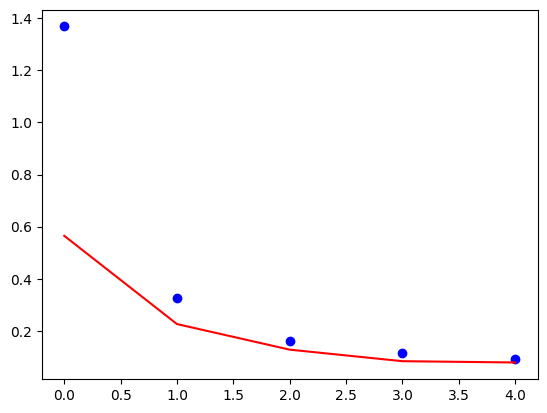

In [21]:
# Plotting model's training cost and model's validation split cost
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.figure()
plt.plot(loss_values, 'bo', label = 'training loss')
plt.plot(val_loss_values, 'r', label = 'val trraining loss')

In [22]:
from sklearn.metrics import r2_score
# Comparing the test and the training model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("\n")
# Calculating the R2_score of the training and testing data in order to see how close the data is to the regression model
print("The R2 Score on the train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 Score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

4/4 [==============================] - 0s 2ms/step


The R2 Score on the train set is:	0.407
The R2 Score on the Test set is:	0.474
